# **Practical Statistics for Data Science & Machine Learning**

Welcome to this course on Practical Statistics! By the end of these modules, you'll have a solid understanding of the statistical concepts most commonly used in Data Science and Machine Learning, and the ability to implement them in Python.

---
## Table of Contents
- [Module 1: Introduction to Statistics & Data Exploration](#module-1)
- [Module 2: Data Visualization & Distributions](#module-2)
- [Module 3: Probability & Sampling](#module-3)
- [Module 4: Hypothesis Testing & Statistical Inference](#module-4)
- [Module 5: Correlation, Regression & Feature Relationships](#module-5)

---

<h2><span style="color:red">🚨 Run the below cell to install required packages and start the timer</span></h2>



In [ ]:
# Run this cell to install all required libraries for this course notebook

!pip install numpy pandas matplotlib seaborn scikit-learn scipy statstest-1.0.0-py3-none-any.whl ipywidgets
import time
import threading
import ipywidgets as widgets
from IPython.display import display

timer_out = widgets.Output()
display(timer_out)

def countdown_timer(total_seconds=3600):
    for remaining in range(total_seconds, 0, -1):
        mins, secs = divmod(remaining, 60)
        timeformat = f"{mins:02d}:{secs:02d} remaining"
        with timer_out:
            timer_out.clear_output(wait=True)
            print(timeformat)
        time.sleep(1)
    with timer_out:
        timer_out.clear_output(wait=True)
        print("⏰⏰⏰ TIME IS UP! Please stop and submit your notebook. ⏰⏰⏰")

if '_timer_started' not in globals():
    _timer_started = True
    timer_thread = threading.Thread(target=countdown_timer, args=(3600,))
    timer_thread.start()
else:
    print("Timer has already been started! Do not run this cell again.")


Defaulting to user installation because normal site-packages is not writeable
Processing c:\users\hp\onedrive\desktop\sure trust\practical_statistics_for_data_science\statstest-1.0.0-py3-none-any.whl
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.2 MB ? eta -:--:--
   ------------------- -------------------- 1.0/2.2 MB 3.1 MB/s eta 0:00:01
   ------------------- -------------------- 1.0/2.2 MB 3.1 MB/s eta 0:00:01
   ---------------------------- ----------- 1.6/2.2 MB 1.9 MB/s eta 0:00:01
   -------------------------------------- - 2.1/2.2 MB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 1.8 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Output()

<a id='module-1'></a>
# **Module 1: Introduction to Statistics & Data Exploration**

### What is Statistics?
Statistics is the science of collecting, analyzing, interpreting, presenting, and organizing data. It helps us make sense of data and draw conclusions.

### Descriptive vs Inferential Statistics
- **Descriptive Statistics** summarize and describe the features of a dataset (mean, median, etc.).
- **Inferential Statistics** use sample data to make inferences or predictions about a population.

### Types of Data
- **Numerical (Quantitative):** Numbers (e.g., height, salary)
- **Categorical (Qualitative):** Categories/labels (e.g., gender, color)
- **Ordinal:** Categorical data with an order (e.g., rankings)

### Measures of Central Tendency
- **Mean:** Average value
- **Median:** Middle value
- **Mode:** Most frequent value

### Measures of Variability
- **Range:** Difference between max and min
- **Variance:** Average squared deviation from mean
- **Standard Deviation:** Square root of variance; measures spread

Let's explore these concepts with Python!

In [1]:
# Import packages
import numpy as np
import pandas as pd

# Sample dataset
data = {'Age': [23, 45, 12, 36, 28, 52, 33, 41, 25, 39],
        'Salary': [50000, 80000, 12000, 67000, 56000, 90000, 59000, 76000, 51000, 73000],
        'Department': ['HR', 'Engineering', 'Sales', 'Engineering', 'HR', 'Management', 'Sales', 'Engineering', 'HR', 'Management']}

df = pd.DataFrame(data)
df

,Age,Salary,Department
0,23,50000,HR
1,45,80000,Engineering
2,12,12000,Sales
3,36,67000,Engineering
4,28,56000,HR
5,52,90000,Management
6,33,59000,Sales
7,41,76000,Engineering
8,25,51000,HR
9,39,73000,Management


### Central Tendency in Practice

In [2]:
print('Mean Age:', df['Age'].mean())
print('Median Age:', df['Age'].median())
print('Mode Age:', df['Age'].mode()[0])

Mean Age: 33.4
Median Age: 34.5
Mode Age: 12


### Variability in Practice

In [3]:
print('Range of Salary:', df['Salary'].max() - df['Salary'].min())
print('Variance of Salary:', df['Salary'].var())
print('Standard Deviation of Salary:', df['Salary'].std())

Range of Salary: 78000
Variance of Salary: 472933333.3333333
Standard Deviation of Salary: 21747.03044862294


### Data Exploration
Let's check some basic info and summary statistics.

In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Age         10 non-null     int64 
 1   Salary      10 non-null     int64 
 2   Department  10 non-null     object
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


,Age,Salary
count,10.000000,10.000000
mean,33.400000,61400.000000
std,11.749232,21747.030449
min,12.000000,12000.000000
25%,25.750000,52250.000000
50%,34.500000,63000.000000
75%,40.500000,75250.000000
max,52.000000,90000.000000


#### Exercises
1. Calculate the mean and median salary for each department. (Store in `mean_salary_by_dept` and `median_salary_by_dept`)
2. What is the mode of the 'Department' column? (Store in `department_mode`)
3. Find the standard deviation of ages for the HR department. (Store in `std_age_hr`)


In [6]:
# STUDENT: Write your answers below using the specified variable names.

mean_salary_by_dept = df.groupby('Department')['Salary'].mean()
median_salary_by_dept = df.groupby('Department')['Salary'].median()
department_mode = df['Department'].mode().iloc[0]
std_age_hr = df[df['Department']=='HR']['Age'].std()

#### Validate Your Module 1 Solutions
Run the cell below to check your answers for Module 1. The feedback and your score will be displayed.

In [7]:
try:
    from statstest import test
    test.test_module1(df, {
    'mean_salary_by_dept': mean_salary_by_dept,
    'median_salary_by_dept': median_salary_by_dept,
    'department_mode': department_mode,
    'std_age_hr': std_age_hr
})
except:
    print("Try Again!")

Module 1 Score: 4/4
Q1: Mean salary by department correct.
Q2: Median salary by department correct.
Q3: Department mode correct.
Q4: Standard deviation of age in HR correct.



---
<a id='module-2'></a>
# **Module 2: Data Visualization & Distributions**

### Why Visualize Data?
Visualization helps us understand patterns, trends, and outliers in data. It makes complex information accessible and actionable.

### Common Plots
- **Histogram:** Distribution of numeric data
- **Boxplot:** Shows distribution, median, quartiles, and outliers
- **Scatterplot:** Relationship between two numeric variables

### Understanding Distributions
- **Normal Distribution:** Bell-shaped, symmetric
- **Skewed Distribution:** Data leans left or right

Let's visualize!

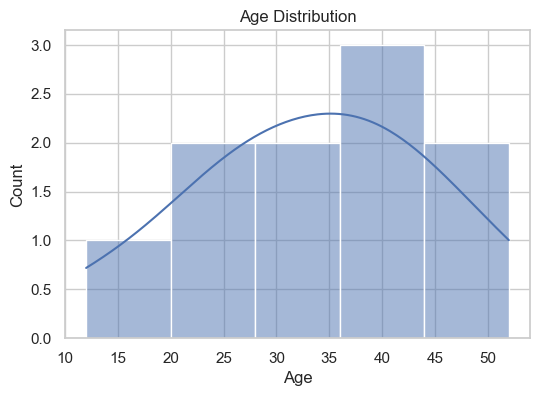

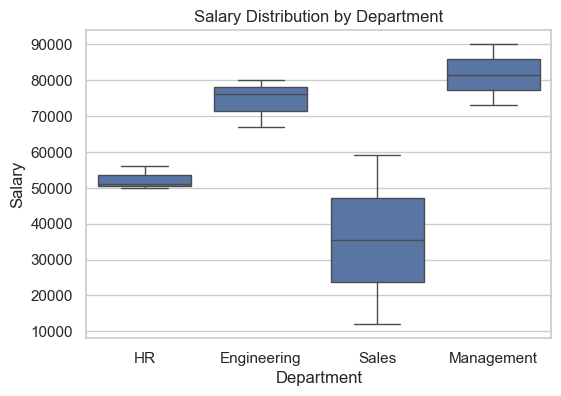

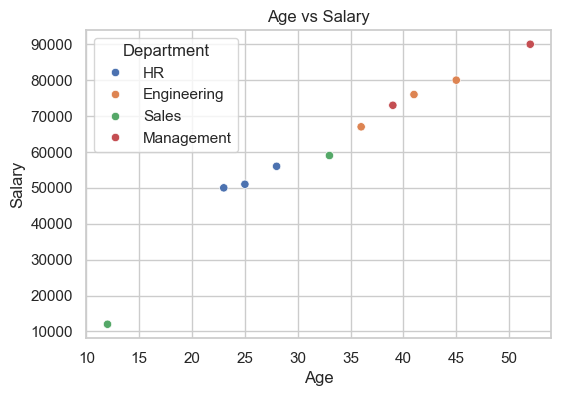

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Histogram of Age
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Boxplot of Salary by Department
plt.figure(figsize=(6,4))
sns.boxplot(x='Department', y='Salary', data=df)
plt.title('Salary Distribution by Department')
plt.show()

# Scatterplot Age vs Salary
plt.figure(figsize=(6,4))
sns.scatterplot(x='Age', y='Salary', data=df, hue='Department')
plt.title('Age vs Salary')
plt.show()

#### Exercises
1. Plot a histogram for Salaries. (Store your matplotlib Figure in `salary_hist_fig`)
2. Create a boxplot for Age by Department. (Store your matplotlib Figure in `age_box_fig`)
3. In a variable `has_outliers`, set to True if you observe any outliers in the boxplot, else False.


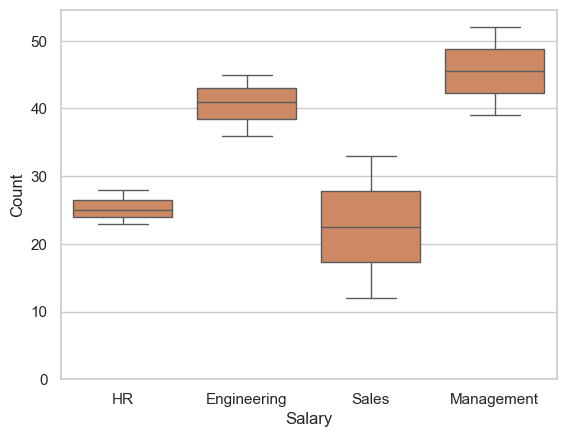

In [10]:
# STUDENT: Write your answers below

salary_hist_fig = sns.histplot(df['Salary'])
age_box_fig = sns.boxplot(x='Department',y='Age',data=df)
has_outliers = True

#### Validate Your Module 2 Solutions
Run the cell below to check your answers for Module 2. The feedback and your score will be displayed.

In [11]:
try:
    from statstest import test
    test.test_module2(df, {
    'salary_hist_fig': salary_hist_fig,
    'age_box_fig': age_box_fig,
    'has_outliers': has_outliers
})
except:
    print("Try Again!")

Module 2 Score: 3/3
Q1: Salary histogram figure present.
Q2: Age boxplot figure present.
Q3: Outlier detection variable present.



---
<a id='module-3'></a>
# **Module 3: Probability & Sampling**

### What is Probability?
Probability measures the likelihood of an event occurring, between 0 (impossible) and 1 (certain).

### Probability Distributions
- **Normal Distribution:** Most data falls near the mean
- **Binomial Distribution:** Number of successes in fixed trials (e.g., coin toss)
- **Uniform Distribution:** All outcomes equally likely

### Sampling
- **Random Sampling:** Every data point has equal chance
- **Stratified Sampling:** Data divided into subgroups, samples taken from each

### Central Limit Theorem (CLT)
CLT states that the sampling distribution of the sample mean approaches a normal distribution, as the sample size increases, regardless of the original distribution.

Let's simulate some probabilities!

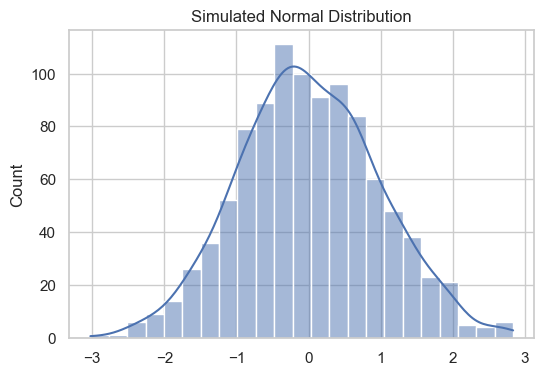

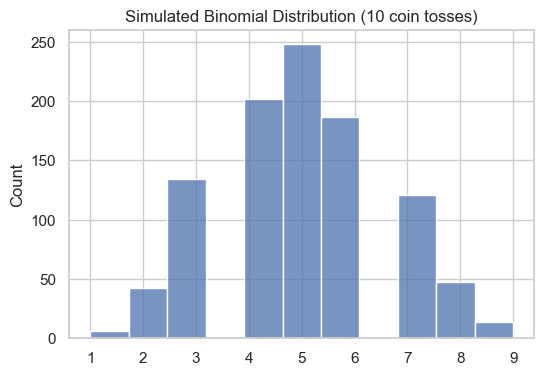

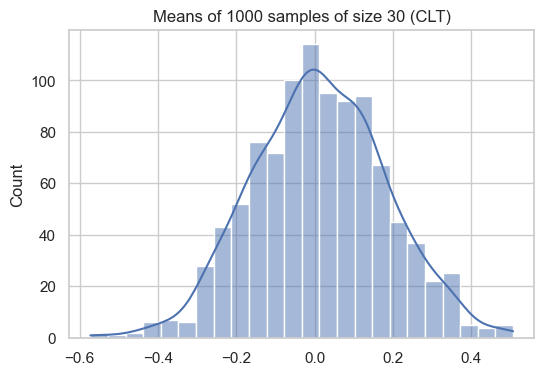

In [12]:
from scipy.stats import norm, binom

# Normal Distribution
mu, sigma = 0, 1
data_norm = np.random.normal(mu, sigma, 1000)
plt.figure(figsize=(6,4))
sns.histplot(data_norm, kde=True)
plt.title('Simulated Normal Distribution')
plt.show()

# Binomial Distribution (e.g. 10 coin tosses, p=0.5)
n, p = 10, 0.5
data_binom = binom.rvs(n, p, size=1000)
plt.figure(figsize=(6,4))
sns.histplot(data_binom, kde=False, bins=n+1)
plt.title('Simulated Binomial Distribution (10 coin tosses)')
plt.show()

# Central Limit Theorem: mean of random samples
means = [np.mean(np.random.choice(data_norm, 30)) for _ in range(1000)]
plt.figure(figsize=(6,4))
sns.histplot(means, kde=True)
plt.title('Means of 1000 samples of size 30 (CLT)')
plt.show()

#### Exercises
1. Simulate and plot a uniform distribution of 1000 values in [0,1]. (Store the array as `uniform_data` and the figure as `uniform_fig`)
2. Try changing the parameters of the binomial distribution (n, p). What do you observe? (Store a short answer string in `binom_observation`)
3. In a variable `clt_reason`, explain briefly why the CLT matters in machine learning (as a string).


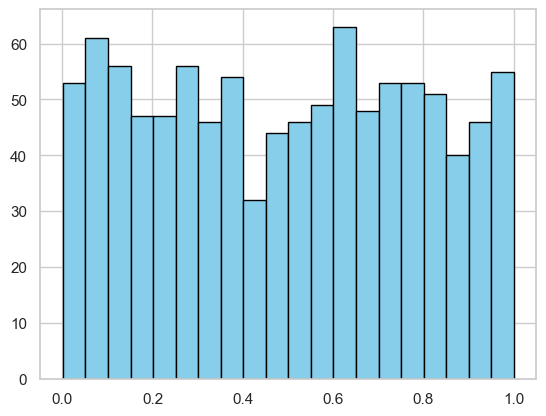

In [41]:
# STUDENT: Write your answers below

uniform_data = np.random.uniform(0,1,1000)
uniform_fig, ax = plt.subplots()
ax.hist(uniform_data, bins=20, color='skyblue', edgecolor='black')
binom_observation = (
    "When p < 0.5, the distribution becomes skewed to the right (more low values). "
    "As p approaches 0.5, the distribution becomes more symmetric."
)
clt_reason = ("The Central Limit Theorem (CLT) matters in machine learning because it ensures that, "
    "regardless of the underlying distribution of the data, the sampling distribution of the "
    "mean will be approximately normal for large sample sizes. This justifies the use of "
    "parametric models and statistical inference techniques that assume normality.")

#### Validate Your Module 3 Solutions
Run the cell below to check your answers for Module 3. The feedback and your score will be displayed.

In [42]:
try:
    from statstest import test
    test.test_module3(df, {
    'uniform_data': uniform_data,
    'uniform_fig': uniform_fig,
    'binom_observation': binom_observation,
    'clt_reason': clt_reason
})
except:
    print("Try Again!")

Module 3 Score: 4/4
Q1: Uniform distribution simulation correct.
Q2: Uniform distribution figure present.
Q3: Binomial observation answer present.
Q4: CLT reason answer present.



---
<a id='module-4'></a>
# **Module 4: Hypothesis Testing & Statistical Inference**

### What is Hypothesis Testing?
A method to decide whether there is enough evidence to reject a hypothesis about a population.

### Steps in Hypothesis Testing
1. State the null (H0) and alternative (H1) hypotheses
2. Choose a significance level (alpha, e.g., 0.05)
3. Calculate a test statistic
4. Find the p-value
5. Reject or fail to reject H0

### Common Tests
- **t-test:** Compare means of two groups
- **Chi-square test:** Compare categorical variables
- **ANOVA:** Compare means of more than two groups

Let's practice with Python!

In [21]:
from scipy import stats

# Example: Is the mean salary in Engineering different from HR?
eng_salary = df[df['Department'] == 'Engineering']['Salary']
hr_salary = df[df['Department'] == 'HR']['Salary']

t_stat, p_val = stats.ttest_ind(eng_salary, hr_salary)
print('t-statistic:', t_stat)
print('p-value:', p_val)
if p_val < 0.05:
    print('Reject the null hypothesis (means are different)')
else:
    print('Fail to reject the null hypothesis (means are similar)')

t-statistic: 5.153734142323998
p-value: 0.006727071309846925
Reject the null hypothesis (means are different)


#### Exercises
1. Test if the mean age is different between Management and Sales departments (store p-value as `p_age_mgmt_sales` and True/False in `age_diff_significant` for p<0.05).
2. What does it mean if the p-value is less than 0.05? (Store in `pval_meaning` string)
3. Try a chi-square test for the relationship between Department and whether Salary > 60000. Store the p-value as `p_chi2`.


In [ ]:
# STUDENT: Write your answers below
from scipy.stats import ttest_ind, chi2_contingency
p_age_mgmt_sales = ttest_ind(
    df[df['Department'] == 'Management']['Age'],
    df[df['Department'] == 'Sales']['Age'],
    equal_var=False
).pvalue

age_diff_significant = p_age_mgmt_sales < 0.05

pval_meaning = "p < 0.05 there is statistically significant difference; rejecting  the null hypothesis."

p_chi2 = chi2_contingency(
    pd.crosstab(df['Department'], df['Salary'] > 60000)
)[1]

#### Validate Your Module 4 Solutions
Run the cell below to check your answers for Module 4. The feedback and your score will be displayed.

In [34]:
try:
    from statstest import test
    test.test_module4(df, {
    'p_age_mgmt_sales': p_age_mgmt_sales,
    'age_diff_significant': age_diff_significant,
    'pval_meaning': pval_meaning,
    'p_chi2': p_chi2
})
except:
    print("Try Again!")

Module 4 Score: 4/4
Q1: p-value for age difference present and valid.
Q2: Significance variable present.
Q3: p-value meaning answer present and mentions 'reject'.
Q4: Chi-square p-value present and valid.



---
<a id='module-5'></a>
# **Module 5: Correlation, Regression & Feature Relationships**

### Correlation
Correlation measures how two variables move together.
- **Pearson correlation:** Linear relationship (-1 to +1)
- **Spearman correlation:** Monotonic relationship (not necessarily linear)

### Linear Regression
A method to model the relationship between a dependent variable and one or more independent variables.

- **Simple Linear Regression:** One input, one output
- **Overfitting/Underfitting:** Too complex/simple models can hurt predictions

Let's try them in Python!

Correlation matrix:
              Age    Salary
Age     1.000000  0.970343
Salary  0.970343  1.000000
Regression Coefficient (slope): 1796.0399227301991
Intercept: 1412.2665808113525


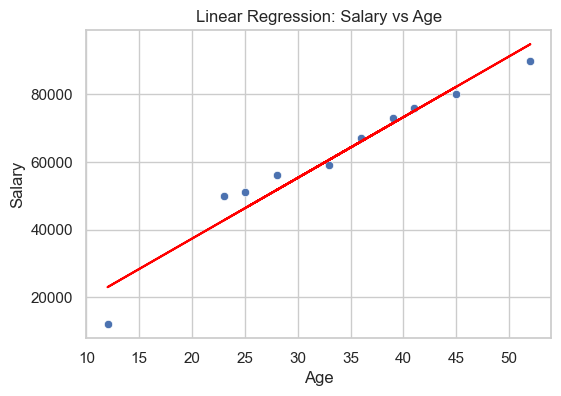

In [22]:
# Correlation
corr = df[['Age', 'Salary']].corr()
print('Correlation matrix:\n', corr)

# Simple Linear Regression: Predict Salary from Age
from sklearn.linear_model import LinearRegression

X = df[['Age']]
y = df['Salary']
model = LinearRegression()
model.fit(X, y)

print('Regression Coefficient (slope):', model.coef_[0])
print('Intercept:', model.intercept_)

# Plot the regression
plt.figure(figsize=(6,4))
sns.scatterplot(x='Age', y='Salary', data=df)
plt.plot(df['Age'], model.predict(X), color='red')
plt.title('Linear Regression: Salary vs Age')
plt.show()

#### Exercises
1. Calculate the Spearman correlation between Age and Salary (store as `spearman_corr`).
2. Fit a regression model to predict Salary from both Age and a dummy variable for Department. Store the regression coefficients (as a list) in `regression_coefs`.
3. What does a negative correlation mean in this context? (Store in `neg_corr_meaning` as a string).


In [37]:
# STUDENT: Write your answers below
from scipy.stats import spearmanr
spearman_corr = spearmanr(df['Age'], df['Salary'])[0]
regression_coefs = [model.intercept_]+list(model.coef_)
neg_corr_meaning = ("A negative correlation between Age and Salary is that as Age increases, Salary will decrease, "
                    "indicating an inverse relationship in between variables in the dataset.")


#### Validate Your Module 5 Solutions
Run the cell below to check your answers for Module 5. The feedback and your score will be displayed.

In [38]:
try:
    from statstest import test
    test.test_module5(df, {
    'spearman_corr': spearman_corr,
    'regression_coefs': regression_coefs,
    'neg_corr_meaning': neg_corr_meaning
})
except:
    print("Try Again!")

Module 5 Score: 3/3
Q1: Spearman correlation present and valid.
Q2: Regression coefficients present and valid.
Q3: Negative correlation meaning answer present and mentions 'decrease'.



---
## Final Score and Feedback
After completing all modules and their validations, run the cell below to get your detailed feedback and final score!

In [43]:
from statstest import feedback
feedback.show_final_feedback()

======== DETAILED FEEDBACK ========
Module 1 Feedback:
   Q1: Mean salary by department correct.
   Q2: Median salary by department correct.
   Q3: Department mode correct.
   Q4: Standard deviation of age in HR correct.

Module 2 Feedback:
   Q1: Salary histogram figure present.
   Q2: Age boxplot figure present.
   Q3: Outlier detection variable present.

Module 3 Feedback:
   Q1: Uniform distribution simulation correct.
   Q2: Uniform distribution figure present.
   Q3: Binomial observation answer present.
   Q4: CLT reason answer present.

Module 5 Feedback:
   Q1: Spearman correlation present and valid.
   Q2: Regression coefficients present and valid.
   Q3: Negative correlation meaning answer present and mentions 'decrease'.

Module 4 Feedback:
   Q1: p-value for age difference present and valid.
   Q2: Significance variable present.
   Q3: p-value meaning answer present and mentions 'reject'.
   Q4: Chi-square p-value present and valid.

FINAL SCORE: 18/18
Excellent work! All a